My Project on Analysing Uber Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Read Data Set
df = pd.read_csv('ncr_ride_bookings.csv')

#Checking the format of the DataFram
#Check the first few rows of the DataFrame
df.head()

#Check the last few rows of the DataFrame
df.tail()

#Check the summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

Cleaning the data

In [3]:
#Check for missing values
print(df.isnull().sum())

#Check for duplicate rows
print(df.duplicated().sum())

#formatting date columns
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

df['Day'] = df['Date'].dt.day_name()
df['Month_name'] = df['Date'].dt.month_name()
df['Hour'] = df['Time'].dt.hour

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64
0


In [4]:
#Finding bookings per day based on time of day

def bookings_by_day_and_hour(df):
    return df.groupby(['Day', 'Hour']).size()

result = bookings_by_day_and_hour(df)
print(result)

Day        Hour
Friday     0        180
           1        187
           2        190
           3        203
           4        204
                   ... 
Wednesday  19      1565
           20      1412
           21      1109
           22       791
           23       428
Length: 168, dtype: int64


In [5]:
#Checking for bvookings by time of day
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'


In [6]:
df['Time of Day'] = df['Hour'].apply(time_of_day)


Plotting our findings

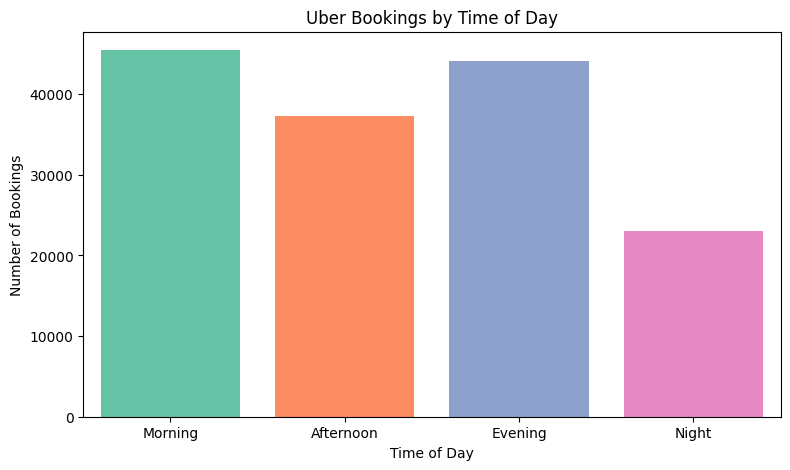

In [7]:
#Plot bookings by time of day
colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3']
plt.figure(figsize=(9,5))
ax = sns.countplot(data=df, x='Time of Day', order=['Morning','Afternoon','Evening','Night'])

for patch, color in zip(ax.patches, colors):
    patch.set_facecolor(color)

plt.title("Uber Bookings by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Bookings")
plt.show()

#Analysis
From the chart, it is noticeable that morning and evening periods record the highest number of bookings, aligning closely with typical commuting hours. These peaks are likely driven by customers travelling to and from work, school, and other daily activities.

In contrast, night time bookings are significantly lower. This reduction may be attributed to several factors, such as decreased travel demand outside rush hours, prices costing more during night, and lower overall mobility as most people are at home or sleeping.

Overall, the distribution highlights a strong correlation between ride demand and daily commuting patterns, with demand declining as the day moves into late night periods.

Checking bookings per hour 

Peak booking hour: 18
Lowest demand hour: 4


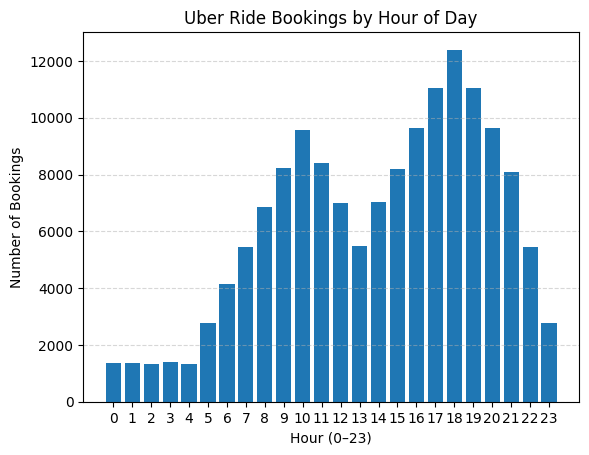

In [8]:
#Analyzing bookings by hour
hourly_bookings = df["Hour"].value_counts().sort_index()
peak_hour = hourly_bookings.idxmax()
low_hour = hourly_bookings.idxmin()

print("Peak booking hour:", peak_hour)
print("Lowest demand hour:", low_hour)

#Plot bookings by hour
plt.figure()

plt.bar(hourly_bookings.index, hourly_bookings.values)

plt.title("Uber Ride Bookings by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Number of Bookings")

plt.xticks(np.arange(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

#Analysis
The graph displays a bimodal distribution, indicating two distinct peaks in booking activity throughout the day.

The first peak occurs at 10 AM, which is interesting as it falls slightly after the traditional morning rush hour. This may suggest continued travel demand beyond early commuting hours, such as flexible work schedules, late starts, or non work related trips including running errands and appointments.

The second and more prominent peak appears at 6 PM (which is also the busiest time of day for uber bookings), aligns closely with the evening rush hour. This period usually represents the highest daily demand as commuters return home from work and overall uber traffic increases.

Overall, the bimodal pattern highlights how Uber ride demand closely follows daily movement behaviour, with sustained activity extending beyond strict commuting windows and peaking most strongly during the evening period.

Checking to see if bookings was made during rush hour or not
Rush hopur is usually between 6-9am and 4-7pm

Rush Hour
Non-Rush Hour    81174
Rush Hour        68826
Name: count, dtype: int64
Rush Hour
Non-Rush Hour    54.116
Rush Hour        45.884
Name: count, dtype: float64


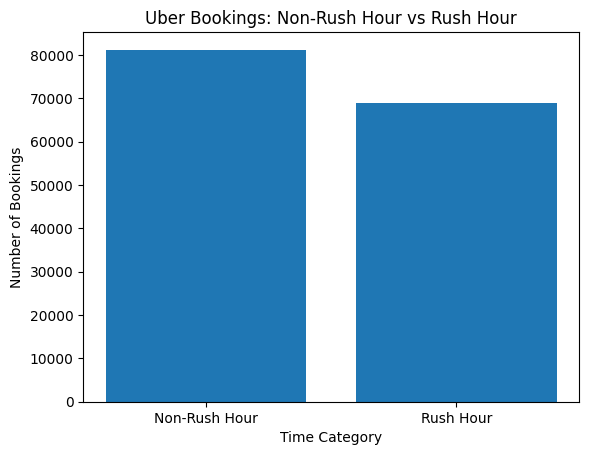

In [9]:
def rush_hour(hour):
    if (6 <= hour <= 9) or (16 <= hour <= 19):
        return "Rush Hour"
    else:
        return "Non-Rush Hour"

df["Rush Hour"] = df["Hour"].apply(rush_hour)

rush_counts = df["Rush Hour"].value_counts()
print(rush_counts)

#Check percentage of bookings during rush hours
rush_percentage = (rush_counts / rush_counts.sum()) * 100
print(rush_percentage)

#Plot bookings during rush hours vs non-rush hours
plt.figure()

plt.bar(rush_counts.index, rush_counts.values)

plt.title("Uber Bookings: Non-Rush Hour vs Rush Hour")
plt.xlabel("Time Category")
plt.ylabel("Number of Bookings")

plt.show()

#Analysis
I used Rush hour periods of 6:00 AM to 9:00 AM and 4:00 PM to 7:00 PM, as these time ranges most logically represent typical commuting patterns.

The morning window captures travel related to work, school, and university commutes, while the evening window reflects the return journeys home from these activities.

The chart indicates that non rush hour rides account for a greater proportion of total bookings compared to rush hour rides. This outcome is expected, as travel demand is not limited to commuting alone. People require transportation throughout the day for a wide range of purposes, including errands, social activities, appointments, and leisure travel.

Overall, while rush hours represent periods of concentrated demand, the results demonstrate that Uber usage remains consistently high across non peak periods, highlighting the platform’s importance as an all day transportation service rather than one used exclusively during commuting hours.

Investing how many rides were completed

Total rides: 150000
Total rides completed: 93000
Percentage of rides by booking status: Booking Status
Completed                62.0
Cancelled by Driver      18.0
No Driver Found           7.0
Cancelled by Customer     7.0
Incomplete                6.0
Name: proportion, dtype: float64


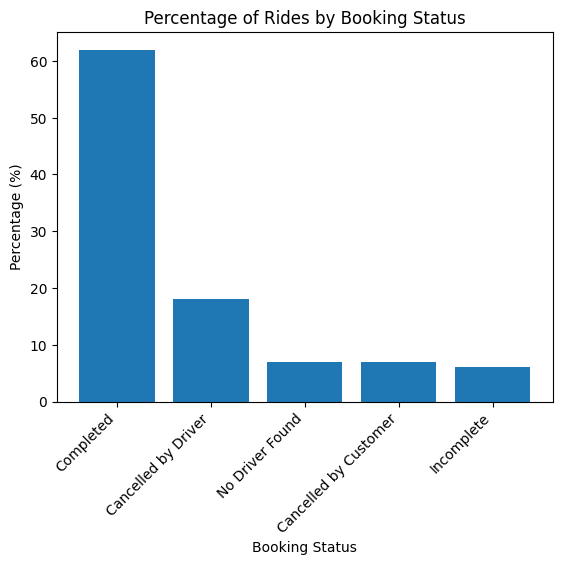

In [28]:
#Checking total completed rides
total_rides = df.shape[0]
print("Total rides:", total_rides)
completed_rides = df[df["Booking Status"] == "Completed"].shape[0]
print("Total rides completed:", completed_rides
      )
#Finding the percentage of completed rides
completion_rate = (df["Booking Status"].value_counts(normalize=True) * 100)
print("Percentage of rides by booking status:", completion_rate)

#Plot findings
plt.figure()

plt.bar(completion_rate.index, completion_rate.values)

plt.title("Percentage of Rides by Booking Status")
plt.xlabel("Booking Status")
plt.ylabel("Percentage (%)")

plt.xticks(rotation=45, ha="right")

plt.show()

#Analysis
Out of a total of 150,000 rides, 93,000 were successfully completed, representing a 62% completion rate. 
This means that 38% of rides were not completed due to driver cancellations, no driver being available, customer cancellations, or incomplete. 
A 62% completion rate is relatively low; as an Uber customer, I would expect this figure to be above 85% for a reliable service experience. 

Investigating cancellations

Total customer cancellations: 10500
Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: int64


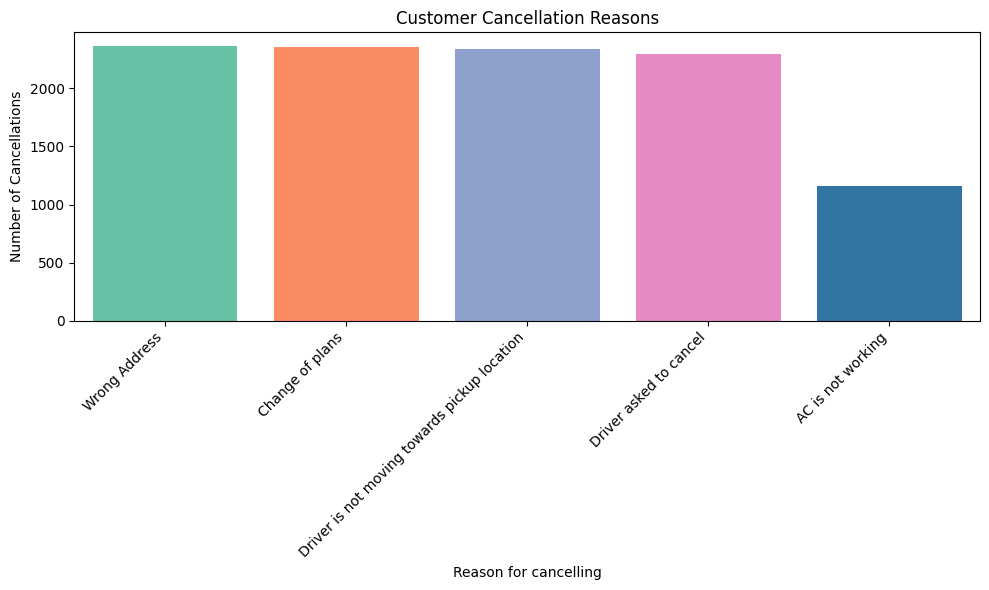

In [29]:
#Creating dataframe for cancelled rides
customer_cancel = df[df["Booking Status"] == "Cancelled by Customer"]
total_customer_cancellations = customer_cancel.shape[0]
print("Total customer cancellations:", total_customer_cancellations)

#Finding reasons for cancellations by customers
cancel_reasons = (
    customer_cancel["Reason for cancelling by Customer"]
    .value_counts()
)

print(cancel_reasons)

#Plotting reasons for cancellations by customers
plt.figure(figsize=(10,6))
cc = sns.countplot(data=customer_cancel, x='Reason for cancelling by Customer', order=cancel_reasons.index)      
for patch, color in zip(cc.patches, colors):
    patch.set_facecolor(color)

plt.title("Customer Cancellation Reasons")
plt.xlabel("Reason for cancelling")
plt.ylabel("Number of Cancellations")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#Analysis
Out of 10,500 customer cancellations, many, such as those caused by incorrect addresses or changes in plans, are beyond the driver’s control. 
However, cancellations resulting from the driver not moving to the pickup location, requesting to cancel, or AC is not working are the driver’s responsibility. 
Reducing these driver related cancellations would significantly improve the overall completion rate.

Investigating vehicle types

Vehicle Type
Auto             37419
Go Mini          29806
Go Sedan         27141
Bike             22517
Premier Sedan    18111
eBike            10557
Uber XL           4449
Name: count, dtype: int64


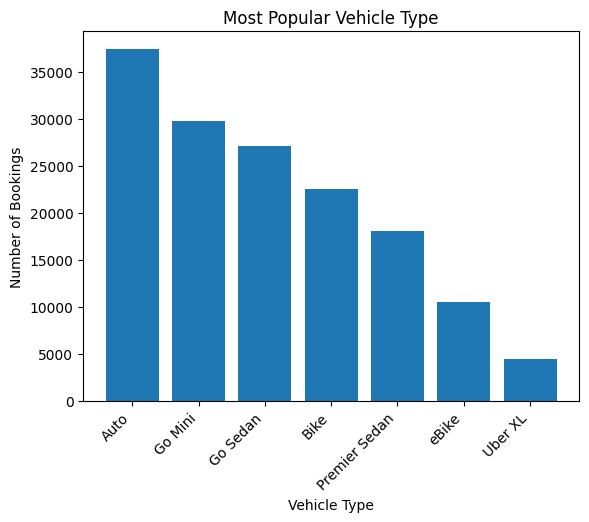

In [30]:
#Count of vehicle types used for bookings
vehicle_counts = df["Vehicle Type"].value_counts()

print(vehicle_counts)

#Find most popular vehicle type
most_popular_vehicle = vehicle_counts.idxmax()

#Plot vehicle type by usage
plt.figure()

plt.bar(vehicle_counts.index, vehicle_counts.values)

plt.title("Most Popular Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Bookings")

plt.xticks(rotation=45, ha="right")

plt.show()

#Analysis
Among the Uber bookings, the most popular vehicle type is Auto, with 37,419 rides, followed by Go Mini at 29,806 rides and Go Sedan at 27,141 rides. 
Together, these three vehicle types account for a significant portion of total bookings, indicating a strong preference for smaller, more affordable options.

Two-wheeled options, Bike and eBike, also represent a notable share with 22,517 and 10,557 rides respectively, suggesting that riders value quick and flexible transport for shorter distances or congested areas.

Premium options like Premier Sedan have 18,111 bookings, showing some demand for comfort and higherend service. 

The Uber XL category is the least utilized, with only 4,449 bookings, reflecting lower demand for larger capacity vehicles.

Overall, the data indicates that the majority of Uber users prefer cost effective and compact vehicles, while premium and larger capacity options remain niche segments.

Looking at some basic statistics

In [31]:
#Define statistics to compute

#Converting booking value to NZD
# INR to NZD exchange rate
INR_TO_NZD = 0.020
df["Booking Value (NZD)"] = df["Booking Value"] * INR_TO_NZD

metrics = {
    'Ride Distance (kms)': 'Ride Distance',
    'Booking Value ($)': 'Booking Value (NZD)',
    'Driver Rating': 'Driver Ratings',
    'Customer Rating': 'Customer Rating',
    'VTAT': 'Avg VTAT',
    'CTAT': 'Avg CTAT'
}

# Compute averages
averages = {name: round(df[col].mean(), 2) for name, col in metrics.items()}

# Print results
for name, value in averages.items():
    print(f"{name}: {value}")

Ride Distance (kms): 24.64
Booking Value ($): 10.17
Driver Rating: 4.23
Customer Rating: 4.4
VTAT: 8.46
CTAT: 29.15


#Analysis

Reviewing the average values across key metrics provides meaningful insight into overall ride behaviour and service performance.

The average ride distance of 24.64 km suggests that a large proportion of Uber trips fall within the medium to long distance range, indicating usage beyond short inner city travel and extending to cross suburb or intercity journeys.

As the dataset originates from India, booking values were converted from Indian Rupees to New Zealand Dollars to improve interpretability. The average booking value of $10.17 NZD is relatively low compared to typical Uber fares in New Zealand where trips often exceed $20. This difference is likely influenced by India’s lower cost of living, lower fuel and labour costs, and greater availability of low cost vehicle options such as bikes and autos.

The average driver rating of 4.23 indicates that customers generally experienced satisfactory service. However, the score also suggests there is room for improvement, potentially related to factors such as traffic delays, pickup wait times, or ride comfort.

The average customer rating of 4.40 is higher than the driver rating, implying that riders are generally perceived more positively by drivers. This may reflect cooperative rider behaviour and relatively smooth trip interactions.

The average VTAT (Vehicle Time to Arrive) of 8.46 minutes is moderately high. This may be attributed to high population density, congested road networks, and heavy traffic conditions in major Indian cities, all of which can increase pickup times and potentially contribute to ride cancellations.

The average CTAT (Customer Trip Time) of 29.15 minutes aligns closely with the average ride distance. Longer travel distances naturally result in extended trip durations, reinforcing the observation that a substantial portion of bookings involve medium to long journeys.

#Executive Summary
The peak booking time is 6 PM, coinciding with evening rush hour. 
However there were more non rush hour bookings than rush hour due to bookings occuring throughout the day, reflecting Uber’s role as a reliable transport option at all times.

The overall ride completion rate is 62%, highlighting room for improvement. 
Many customer cancellations are linked to driver related issues, suggesting that stricter enforcement of driver accountability could increase completion rates.

Vehicle preferences show a strong demand for affordable options, with Auto and Go Mini leading, followed by bikes. 
Premium rides such as Premier Sedan have a smaller but notable market, indicating a segment for luxury travel.

Overall, the data provides key insights into customer behavior and operational performance, highlighting opportunities to enhance service reliability and meet rider demand more effectively.
